# The race statastics 

This notebook looks at the individual race statistics, look at the results 

In [1]:
import json, urllib
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 7.0)

Year = "2017"
race_number = 5

url_Laps = "http://ergast.com/api/f1/%s/%s/laps/1.json" % (Year, race_number)
url_Results = "http://ergast.com/api/f1/%s/%s/results.json" % (Year, race_number)

Extracting the results from the race results 

In [2]:
response_Results = urllib.urlopen(url_Results)
JSON_Results = json.loads(response_Results.read()) 
laps_total = int(JSON_Results["MRData"]["RaceTable"]["Races"][0]["Results"][0]["laps"])
Race_Results = JSON_Results["MRData"]["RaceTable"]["Races"][0]["Results"]

Extract the lap times

In [3]:
print JSON_Results["MRData"]["RaceTable"]["Races"][0]["Results"][0]["Driver"]["driverId"]

hamilton


In [4]:
lap_positions = np.zeros([laps_total-1,len(Race_Results)])

for lap in range(laps_total-1):
    url_Laps = "http://ergast.com/api/f1/%s/%s/laps/%i.json" % (Year, race_number, lap)
    response_Laps = urllib.urlopen(url_Laps)
    JSON_Laps = json.loads(response_Laps.read())
    lapTimes = JSON_Laps["MRData"]["RaceTable"]["Races"][0]["Laps"][0]["Timings"]
    for pos in range(len(lapTimes)):
        for driver in range(len(Race_Results)):
            if lapTimes[pos]["driverId"] == Race_Results[driver]["Driver"]["driverId"]:
                lap_positions[lap, driver] = pos + 1
            elif lap_positions[lap, driver] == 0:
                lap_positions[lap, driver] = float('nan')



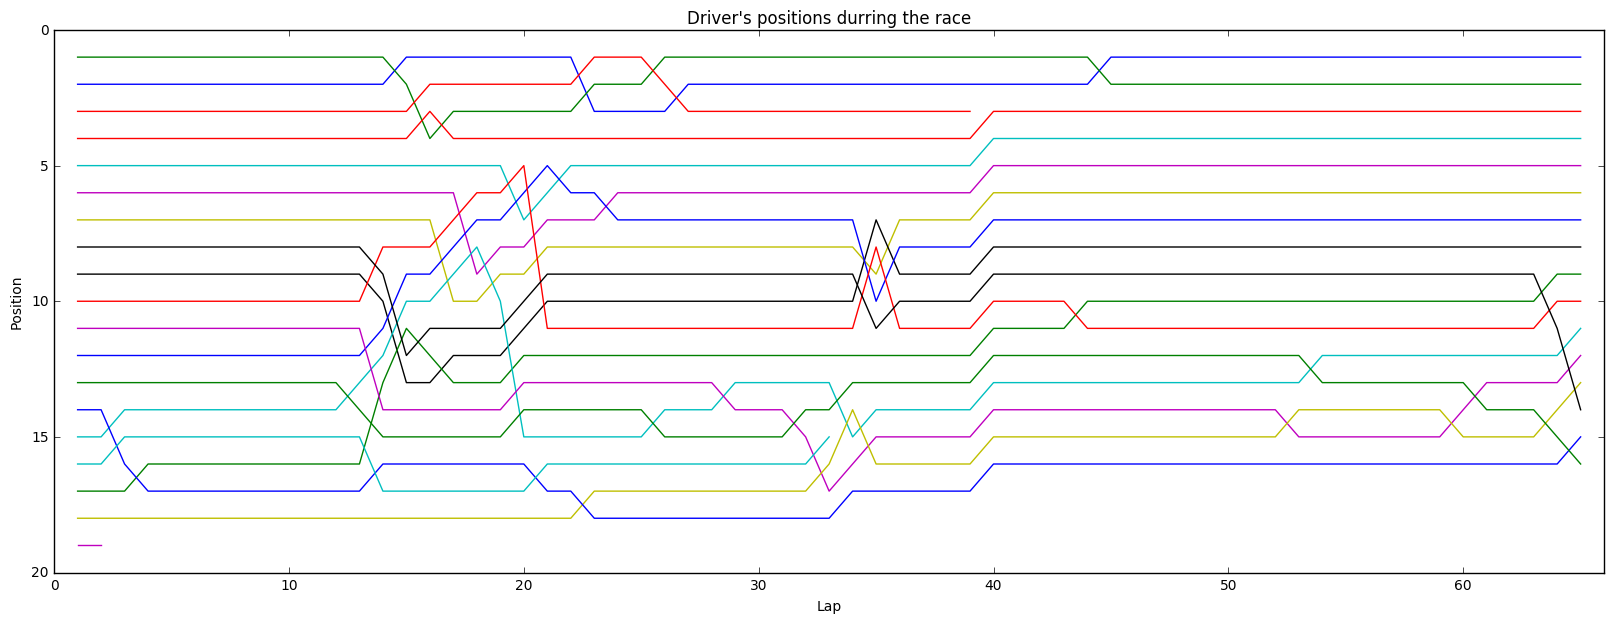

In [5]:

plt.plot(range(1,laps_total),lap_positions)
plt.title("Driver's positions durring the race")
plt.xlabel("Lap")
plt.ylabel("Position")
plt.grid = True
plt.xlim([0,laps_total])
plt.gca().invert_yaxis()
plt.show()

Procesing the results